LOGESTIC REGRESSION: Main idea of logestic regression is to draw a linear seperable line between the different classes or categories

First we see how can we implemnt logistic regression using perceptron trick

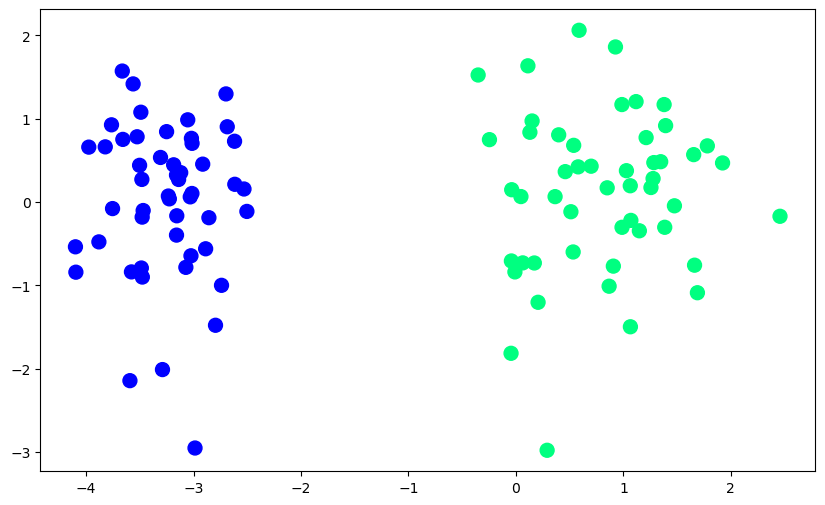

In [12]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

We created a data of 100 samples with 2columns assume green dots are positive class and blue dots are negative class

Now we should assume some random line Ax1+Bx2+c=0 let the coefficents be 1
so the random line become x1+x2+1=0

(-4.0, 3.0)

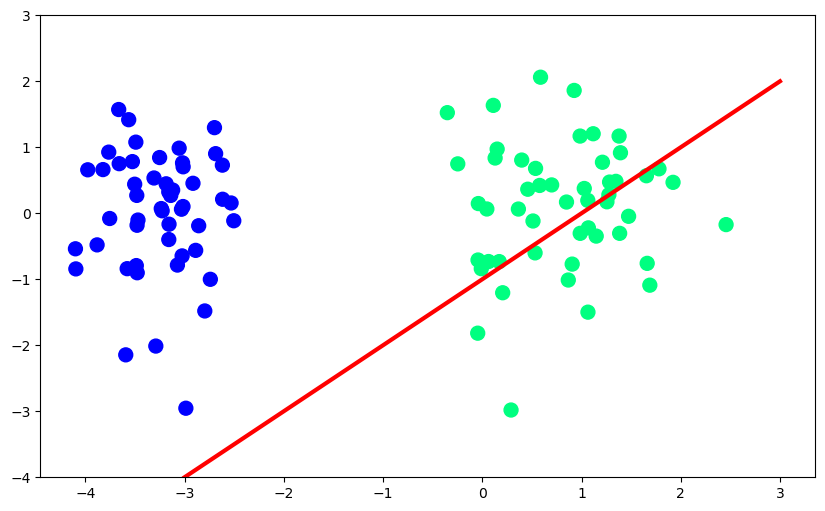

In [19]:
m=1
b=-1
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-4,3)

This was the some randomly initialized line now we will see how this line adjust with misplaced points using perceptron trick

Perceptron trick:
 It is uses simple mathemetics
 we pick a row randomly from input data set let the values of attributes x1=x1 and x2=x2
 if Ax1+Bx2+c>=0 then the point lies on the positive side of the line then assume we assign 1 to output of that row
 if Ax1+Bx2+c<0 then the point lies on the negative side of the line then assume we assign 0 to output of that row
 this assigned 1 and 0 to the output's are predicted values
 now assume 4 cases of y_acutal and y_predicted

 

(Y_actual, Y_predicted)=(0,0),(1,1),(0,1),(1,0)

In first case Y_actual telling that the point should be at the negative side of the line and y_predicted declares that point lies
at the negative side of the assumed line then we do not apply any transformation as they are in correct positons

same concept applies for 2nd case also

In 3rd case y_actual telling that the point belongs to the negative side of the line and y_predicted telling the point lies on the
positive side of the assumed line so now we apply transformation on coeff of line in such a way such that the point now lies on the 
negative side of the line

new_coeff=old_coeff-lr*X where lr=learning rate and X=coordinates of that particular point

In 4th case also we applies same theory 
new_coeff=old_coeff+lr*X where lr=learning rate and X=coordinates of that particular point


The combined function to transform the line according to the misplaced points was
 new_coeff=old_coeff-lr*(y_actual-y_predicted)*X


Now we see how line changes it's position according to the trasformation function

In [22]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1) ### add 1's column at starting
    weights=np.ones(X.shape[1]) ### takes coeff of eq are 1's
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights)) ### step function
        weights=weights+lr*(y[j]-y_hat)*X[j] ### transformation function
    return weights[0],weights[1:,]
def step(z):
    return 1 if z>0 else 0

In [25]:
intercept,coeff_=perceptron(X,y)

In [26]:
intercept

1.3000000000000003

1.3 was the intercept of the final line after performing transformation according to all points

In [27]:
coeff_

array([1.0198596 , 0.33857969])

We A=1.012 and B=0.340

So the final line equation of logistic regression using perceptron trick was
 1.012*x1+0.340*x2+1.3

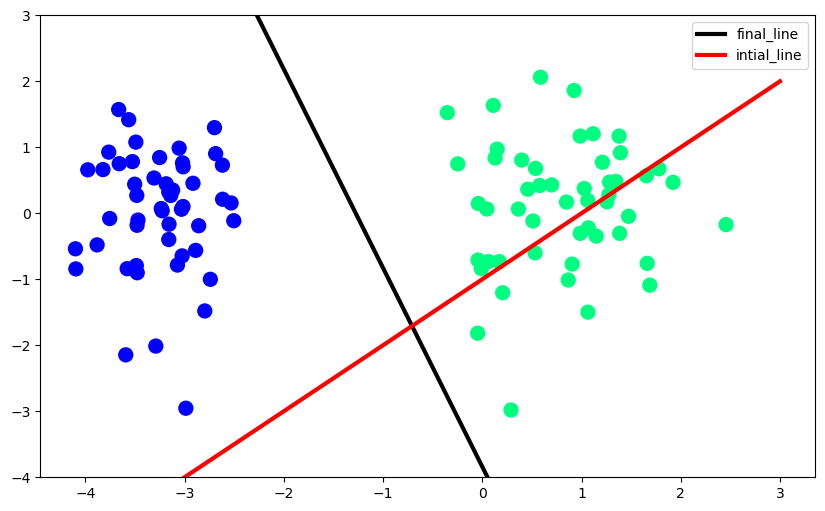

In [34]:
m1=-(coeff_[0]/coeff_[1])
b1=-(intercept/coeff_[1])
x_in=np.linspace(-3,3,100)
y_in=m1*x_in+b1
plt.figure(figsize=(10,6))
plt.plot(x_in,y_in,label="final_line",color='black',linewidth=3)
plt.plot(x_input,y_input,label="intial_line",color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-4,3)
plt.legend()

Black line was the final line after appplying transformation according to all points

Finally!!! we draw a linear seperable line between the classes using perceptron trick called logestic regression using
perceptron trick

Now lets try some inputs on the final line

In [35]:
x1=-1.23
x2=2.34
coeff_[0]*x1+coeff_[1]*x2+intercept

0.837849171274439

which is >0 so (x1,y1) belongs to the positive side of the line lets check on the graph

(-4.0, 3.0)

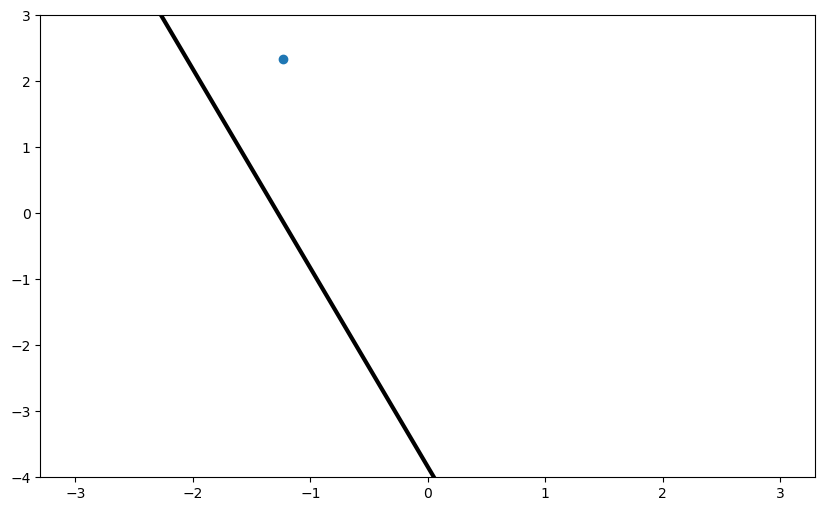

In [40]:
plt.figure(figsize=(10,6))
plt.plot(x_in,y_in,label="final_line",color='black',linewidth=3)
plt.scatter(x1,x2)
plt.ylim(-4,3)

This was the idea of logestic_regression with perceptron trick

But the actual implementation of logestic_regression available on sklearn was not this one because there is a drawback in this
perceptron trick for logestic regression

Drawback: Yes we are able to draw a linear seperable line between categories but we are not able find symmetry between
the categories in perceptron trick once we place all the mismatched points on the correct positions the algo will stop
which causes sometimes the line becomes bias towards a particular class sometimes line came near to the particular class 

to avoid this we use another techniques which was actually implemented in sklearn

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log=LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [73]:
c=log.coef_
c

array([[2.36679363, 0.02300492]])

In [93]:
t=log.intercept_
t

array([3.13571596])

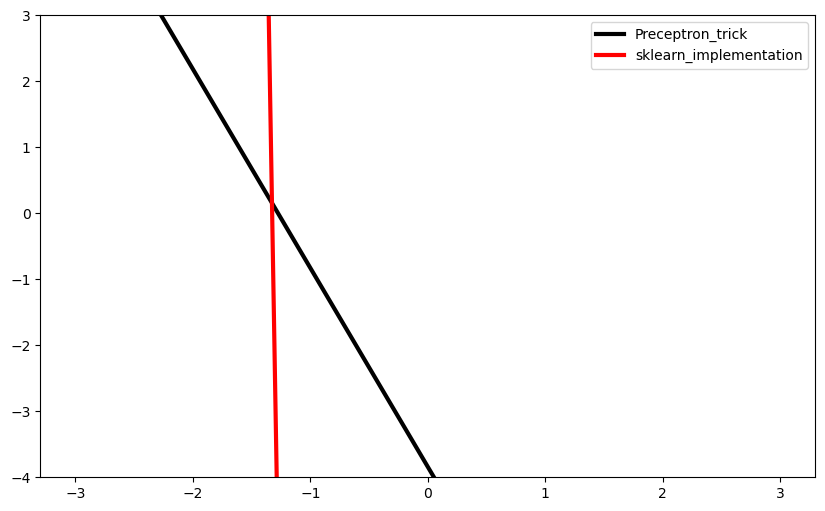

In [75]:
m1=-(coeff_[0]/coeff_[1])
b1=-(intercept/coeff_[1])
m2=-(c[0][0]/c[0][1])
b2=-(t/c[0][1])
x_in=np.linspace(-3,3,100)
y_in=m1*x_in+b1
y_=m2*x_in+b2
plt.figure(figsize=(10,6))
plt.plot(x_in,y_in,label="Preceptron_trick",color='black',linewidth=3)
plt.plot(x_in,y_,label="sklearn_implementation",color='red',linewidth=3)
plt.ylim(-4,3)
plt.legend()

See the difference between the  logistic regression using perceptron trick and sklearn implemnetation

sklearn implementation makeing symmetry between the categories now we see actual implementaion of logestic regression

Now we apply another veriation perceptron trick using sigmoid funtion instead of step functio

sigmod(z)=1/(1+e^-z)

In [76]:
def perceptron_sigmoid(X,y):
    X=np.insert(X,0,1,axis=1) ### add 1's column at starting
    weights=np.ones(X.shape[1]) ### takes coeff of eq are 1's
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights)) ### step function
        weights=weights+lr*(y[j]-y_hat)*X[j] ### transformation function
    return weights[0],weights[1:,]
def step(z):
    return 1/(1+np.exp(-z))

In [77]:
i,c11=perceptron_sigmoid(X,y)

In [78]:
i

2.905465350970225

In [79]:
c11

array([2.80167743, 0.17289536])

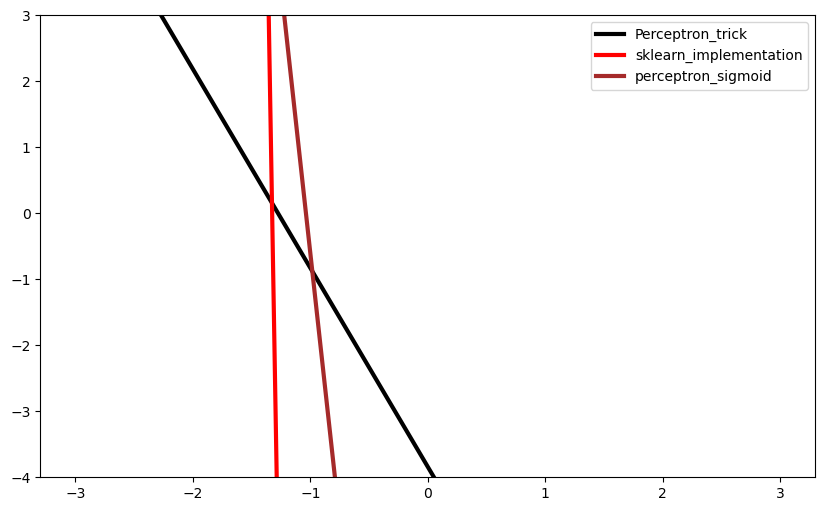

In [81]:
m1=-(coeff_[0]/coeff_[1])
b1=-(intercept/coeff_[1])
m2=-(c[0][0]/c[0][1])
b2=-(t/c[0][1])
m3=-(c11[0]/c11[1])
b3=-(i/c11[1])
x_in=np.linspace(-3,3,100)
y_in=m1*x_in+b1
y_=m2*x_in+b2
y_3=m3*x_in+b3
plt.figure(figsize=(10,6))
plt.plot(x_in,y_in,label="Perceptron_trick",color='black',linewidth=3)
plt.plot(x_in,y_,label="sklearn_implementation",color='red',linewidth=3)
plt.plot(x_in,y_3,label="perceptron_sigmoid",color='brown',linewidth=3)
plt.ylim(-4,3)
plt.legend()

Sigmoid implementation is nearest to actual sklearn implementation but not same that is we have to apply some other logic to get required line

Now we use max likelihood concept to get best fit line. We dervie a loss function called log-loss error or Binary cross entropy
cross entrop = summation of negative log of max likelihood
Therefore Loss fucntion=summation(-y_actual*log(y_predicted)-(1-y_actual)*log(1-y_predicted))


Now we have to minimize this loss function but unfortunately we don't have any closed form of solution for this we should apply gradient descent

In [132]:
def Logistic_regression(X,y):
    X=np.insert(X,0,1,axis=1) ### add 1's column at starting
    weights=np.ones(X.shape[1]) ### takes coeff of eq are 1's
    lr=0.3
    for i in range(10000):
        y_hat=sigmoid(np.dot(X,weights)) ### sigmoid function
        weights=weights+(lr*np.dot((y-y_hat),X))/X.shape[0] ### transformation function
    return weights[0],weights[1:,]
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [133]:
l_i,lo=Logistic_regression(X,y)

In [134]:
lo

array([4.966969  , 0.22312224])

In [135]:
l_i

6.015928867700643

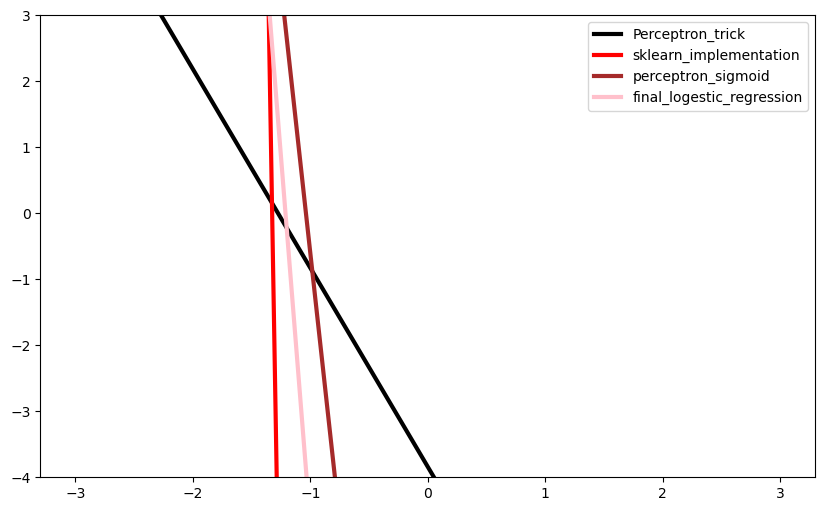

In [136]:
m1=-(coeff_[0]/coeff_[1])
b1=-(intercept/coeff_[1])
m2=-(c[0][0]/c[0][1])
b2=-(t/c[0][1])
m3=-(c11[0]/c11[1])
b3=-(i/c11[1])
m4=-(lo[0]/lo[1])
b4=-(l_i/lo[1])
x_in=np.linspace(-3,3,100)
y_in=m1*x_in+b1
y_=m2*x_in+b2
y_3=m3*x_in+b3
y_i=m4*x_in+b4
plt.figure(figsize=(10,6))
plt.plot(x_in,y_in,label="Perceptron_trick",color='black',linewidth=3)
plt.plot(x_in,y_,label="sklearn_implementation",color='red',linewidth=3)
plt.plot(x_in,y_3,label="perceptron_sigmoid",color='brown',linewidth=3)
plt.plot(x_in,y_i,label="final_logestic_regression",color='pink',linewidth=3)
plt.ylim(-4,3)
plt.legend()

Fianlly the actual sklearn libary implementation and our scratch code line was nearly same this is how actual sklearn logistic regression
was implemented


Fianlly!!!!!!!! we dit it